<a href="https://colab.research.google.com/github/manikbali/gsics/blob/main/Process_GSICS_DCC_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GSICS Product User Platform [VIS/DCC]
*By Manik Bali, ESSIC/UMD*

We present here a python platform built on Google Colab, aimed to help users use GSICS DCC products.

**This note book can.**

1. Pick a GSICS DCC product directly from  [GSICS Product Catalog](https://www.star.nesdis.noaa.gov/smcd/GCC/ProductCatalog.php)
2. Extract variables from GSICS products
3. Plot extracted Variables
4. Apply the correction coefficients to correct biases in monitored instrument and plot them
5. Instantly share your code and data with the GSICS community, its users and friends ( ISCCP, GEO, GCOS, WMO members )

GSICS DCC product aims to monitor VIS Band of

1.   MSG-1 Vs Aqua-MODIS  [[NRT](http://gsics.eumetsat.int/thredds/catalog/msg1-seviri-aqua-modis-demo-nrtc/catalog.html),[ RAC](http://gsics.eumetsat.int/thredds/catalog/msg1-seviri-aqua-modis-demo-rac/catalog.html) ]
2.   MSG-3 Vs Aqua-MODIS  [[NRT](http://gsics.eumetsat.int/thredds/catalog/msg3-seviri-aqua-modis-demo-nrtc/catalog.html),[ RAC](http://gsics.eumetsat.int/thredds/catalog/msg3-seviri-aqua-modis-demo-rac/catalog.html) ]
3.   MSG-4 Vs Aqua-MODIS  [[NRT](http://gsics.eumetsat.int/thredds/catalog/msg4-seviri-aqua-modis-demo-nrtc/catalog.html),[ RAC](http://gsics.eumetsat.int/thredds/catalog/msg4-seviri-aqua-modis-demo-rac/catalog.html) ]

by comparing with Aqua MODI using Deep Convective Cloud ( DCC ) as a transfer.
This is illustrated in the image below. Details are available in the product ATBD by Sebastien Wagner (EUMETSAT)

http://gsics.atmos.umd.edu/pub/Development/SEVIRModisReview/ATBD_for_EUMETSAT_GSICS_Inter-Calibration_with_MODIS_using_Deep_Convective_Clouds_1.docx



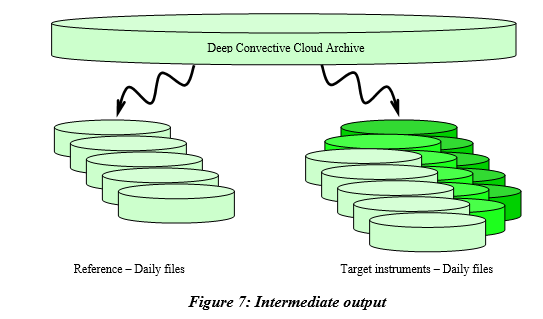

**How to User this Notebook**

1. On another tab go to GSICS Product Catalog
2. Identify the DCC data you wish to dive into and save the url of the Data Hyperlink of the product ( see image below)
3. Pate the link in the URL (url=) field below
4. Run the Code in the note book ( Runtime-> Run All)
5. Scroll down to see the results

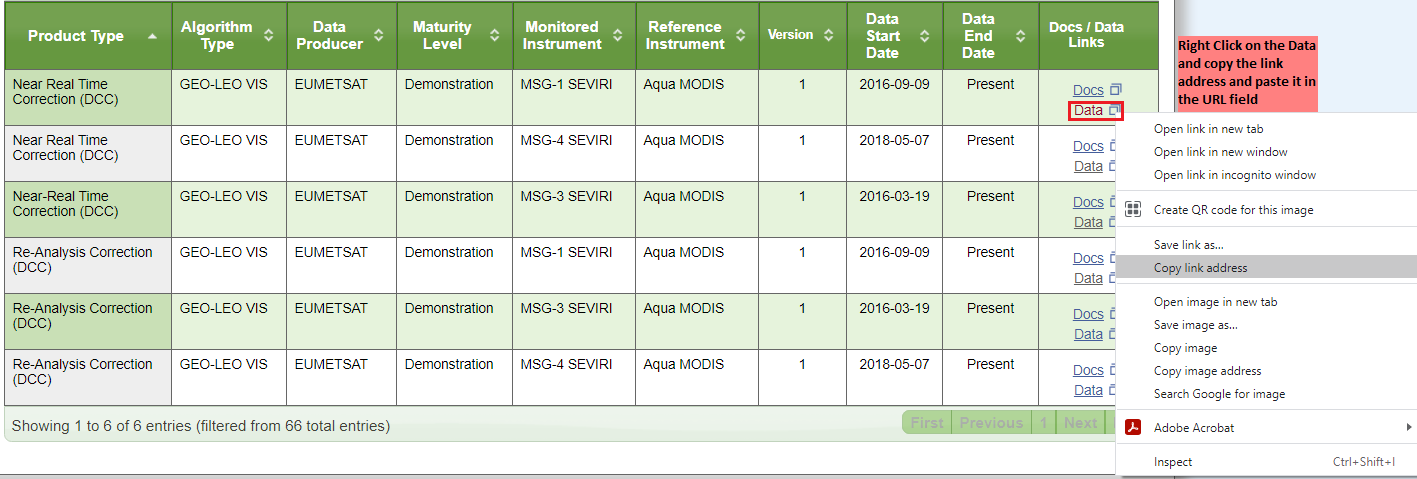

**url= 'url copied above # Scroll below to the code to get this **

**Features of GSICS User Google Colab Platform**:

Google Colab is a collaborative development environment. Its a Paradigm shift in the manner in which GSICS data and code are being shared. Here we are sharing data with a working instance of the algorithm and a python code.
Members accessing this colab can contribute their modules to the Colab notebook as well as pick up code from here (under the GSICS GPL)

Currently accessible by most of the GSICS member agencies. It gives a python run time environment directly in your browser. The platform is shareable, comes free and has cloud computing resources inbuilt into it.
GSICS members can make contributions of code directly into the colab library.

**How to plot variables in a GSICS products**

The first part of the code reads in GSICS data( NetCDF) that resides on the GSICS product Catalog and plots the bias on the Stadard Scene.
One can plot any variable extracted from the GSICS Product. Here we plot the Standard Scente Temp bias time series.

**How to use Correction Coefficients to correct biases**

The second part of the code uses the GSICS Correction coefficients that can be used to correct the operationally produced radiance in the GEO
Meteosat/SEVIRI L1.5 data, LGEO, so its calibration is consistent with that of the LEO reference instrument, Metop/IASI, LLEO.

The steps uses are the following

The operational radiance, LGEO, is calculated from the L1.5 counts as:

Equation 1:


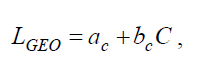


where C is the pixel count, ac and bc are the operational offset and slope calibration
coefficients, respectively, referred to as Cal_Offset and Cal_Slope in the L1.5 files [AD-3].

The GSICS Corrected radiance is then given by Equation 2, which may be re-written as


Equation 2 [ Corrected Radiance can be written as]:

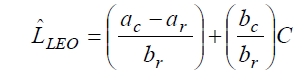

where ar  and br  are the coefficients of the GSICS Correction given in the netCDF file as the
variables offset and slope, respectively.

This is equivalent to  changing the space count  and calibration coefficient in Equation 4 to
ag=(ac- ar)/br and bg= (bc/br), respectively.


Modus Operandi
The code reads in the correction coefficients and applies these on a synthetic GEO measurement to get an estimate of the impact of using GSICS Correction Coefficients


**References**

EUMETSAT GSICS Product User Guide [link](https://www.eumetsat.int/website/wcm/idc/idcplg?IdcService=GET_FILE&dDocName=PDF_DMT_803180&RevisionSelectionMethod=LatestReleased&Rendition=Web)

In [ ]:
url="http://gsics.eumetsat.int/thredds/catalog/msg1-seviri-aqua-modis-demo-nrtc/catalog.html"
#url="http://gsics.eumetsat.int/thredds/catalog/msg1-seviri-aqua-modis-demo-rac/catalog.html"  # Paste the url copied from Data hyperlink and press Runtime -> Run all and scroll below to see results

In [ ]:
!pip install netCDF4
!pip install julian
!pip install cftime

import netCDF4 as nc4
import numpy as np
import matplotlib.pyplot as plt
import datetime
import urllib.request
from datetime import date
import julian
import matplotlib
from cftime import num2pydate
from netCDF4 import num2date
import pandas as pd
from datetime import datetime
import urllib.request

import requests
from bs4 import BeautifulSoup
import xarray


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for julian: filename=julian-0.14-py3-none-any.whl size=2612 sha256=63e17c0e886b9d11be0037e5646469ed027d9f0697ba69296371c5423c5f4dc8
  Stored in directory: /root/.cache/pip/wheels/03/10/8c/d2e9275374f869cd79f9f19f251876f97272f0c4ce60e3a053
Successfully built julian


In [ ]:
headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

#datasets = [xray.open_dataset(url) for url in urls]
#merged = xray.concat(datasets, 'forecast_time')
#merged.to_netcdf('all-data.nc')

#url = "http://gsics.eumetsat.int/thredds/catalog/msg1-seviri-aqua-modis-demo-nrtc/catalog.html"
#url="http://gsics.eumetsat.int/thredds/catalog/msg1-seviri-aqua-modis-demo-nrtc/catalog.html"

basen=url.split('/')
basen.insert(basen.index('thredds')+1,'fileServer')
basen.remove("catalog")
s='/'
req = requests.get(url, headers)
soup = BeautifulSoup(req.content, 'html.parser')
urllist=[]
filelist=[]
nrtfiles=[]
for a in soup.find_all('a', href=True):
    hhref = a['href'].split('/')
    if(np.size(hhref) ==2):
        fname=a.text
        basen[-1] = a.text
        print(s.join(basen))
        fileurl=s.join(basen)
        urllist.append(fileurl)
        filelist.append(a.text)
        urllib.request.urlretrieve(fileurl, fname)
#        ncid=nc4.Dataset(fname,'r')
        nrtfiles.append(xarray.open_dataset(fname))
#        dataset=xarray.open_dataset (fileurl)

merged = xarray.concat(nrtfiles, 'date')
merged.to_netcdf('all-data.nc')

http://gsics.eumetsat.int/thredds/fileServer/msg1-seviri-aqua-modis-demo-nrtc/W_XX-EUMETSAT-Darmstadt,SATCAL+NRTC+GEOLEOVNIR,MSG1+SEVIRI-Aqua+MODIS_C_EUMG_20220126000000_demo_01.nc
http://gsics.eumetsat.int/thredds/fileServer/msg1-seviri-aqua-modis-demo-nrtc/W_XX-EUMETSAT-Darmstadt,SATCAL+NRTC+GEOLEOVNIR,MSG1+SEVIRI-Aqua+MODIS_C_EUMG_20220125000000_demo_01.nc
http://gsics.eumetsat.int/thredds/fileServer/msg1-seviri-aqua-modis-demo-nrtc/W_XX-EUMETSAT-Darmstadt,SATCAL+NRTC+GEOLEOVNIR,MSG1+SEVIRI-Aqua+MODIS_C_EUMG_20220124000000_demo_01.nc
http://gsics.eumetsat.int/thredds/fileServer/msg1-seviri-aqua-modis-demo-nrtc/W_XX-EUMETSAT-Darmstadt,SATCAL+NRTC+GEOLEOVNIR,MSG1+SEVIRI-Aqua+MODIS_C_EUMG_20220123000000_demo_01.nc
http://gsics.eumetsat.int/thredds/fileServer/msg1-seviri-aqua-modis-demo-nrtc/W_XX-EUMETSAT-Darmstadt,SATCAL+NRTC+GEOLEOVNIR,MSG1+SEVIRI-Aqua+MODIS_C_EUMG_20220122000000_demo_01.nc
http://gsics.eumetsat.int/thredds/fileServer/msg1-seviri-aqua-modis-demo-nrtc/W_XX-EUMETSAT-Dar

In [ ]:
ncid = xarray.concat(nrtfiles, 'date')
print(nrtfiles[0].date)
print(ncid)

<xarray.DataArray 'date' (date: 1)>
array(['2022-01-26T00:00:00.000040192'], dtype='datetime64[ns]')
Coordinates:
  * date     (date) datetime64[ns] 2022-01-26T00:00:00.000040192
Attributes:
    bounds:         validity_period
    long_name:      date of evaluation
    standard_name:  time
<xarray.Dataset>
Dimensions:              (date: 1901, chan: 1, method: 2, validity: 2)
Coordinates:
  * date                 (date) datetime64[ns] 2022-01-26T00:00:00.000040192 ...
Dimensions without coordinates: chan, method, validity
Data variables:
    central_wavelength   (date, chan) float32 0.000635 0.000635 ... 0.000635
    channel_name         (date, chan) |S5 b'VIS06' b'VIS06' ... b'VIS06'
    method_name          (date, method) |S5 b'DCC' b'BLEND' ... b'DCC' b'BLEND'
    mon_official_offset  (date, chan) float32 31.59 31.59 nan ... 30.46 30.46
    mon_official_slope   (date, chan) float32 0.6194 0.6194 ... 0.5973 0.5973
    mon_offset           (date, chan, method) float32 nan nan nan ... 

In [ ]:
print(nrtfiles[0].validity_period )
#print(ncid.validity_period)

<xarray.DataArray 'validity_period' (date: 1, validity: 2)>
[2 values with dtype=datetime64[ns]]
Coordinates:
  * date     (date) datetime64[ns] 2022-01-26T00:00:00.000040192
Dimensions without coordinates: validity
Attributes:
    long_name:      correction validity period
    standard_name:  time


# Nuova sezione

In [ ]:

# Open the GSICS netCDF file and read variables [ You can add in more]

mon_official_offset      = ncid.variables['mon_official_offset'][:][:] # Official Offset
mon_official_slope      = ncid.variables['mon_official_slope'][:][:] # Official Bias
mon_offset      = ncid.variables['mon_offset'][:][:] # Official Offset
mon_slope      = ncid.variables['mon_slope'][:][:] # Official Bias
time_array    = ncid.variables['date'][:] #time
freq_array    = ncid.variables['central_wavelength'][:] #wnc
weight_method   = ncid.variables['weight_method'][:] # Scene TB
mon_inst   = ncid.monitored_instrument
ref_inst   = ncid.reference_instrument


#delta_slope    = ncid.variables['delta_slope'][:] # Slope
#delta_offset    = ncid.variables['delta_offset'][:] # Offset
#reference_name    = ncid.variables['reference_name'][:] # Refname
#     time_array =time_array/86400.0

In [ ]:
cf=np.array(freq_array)*1000
cf=np.around(cf,decimals=4)
cfreq = [[str(freq)] + [u"\u03bcm"] for freq in cf  ]

#cfreq=[ ''.join(cfreq[fr] for fr in range(len(cfreq))]

print(np.unique(freq_array))
print(cfreq[0][0]+cfreq[0][1])
print(str(ncid.title))

[0.000635]
[0.635]μm
MSG1+SEVIRI vs Aqua+MODIS GSICS Near-Real-Time Correction


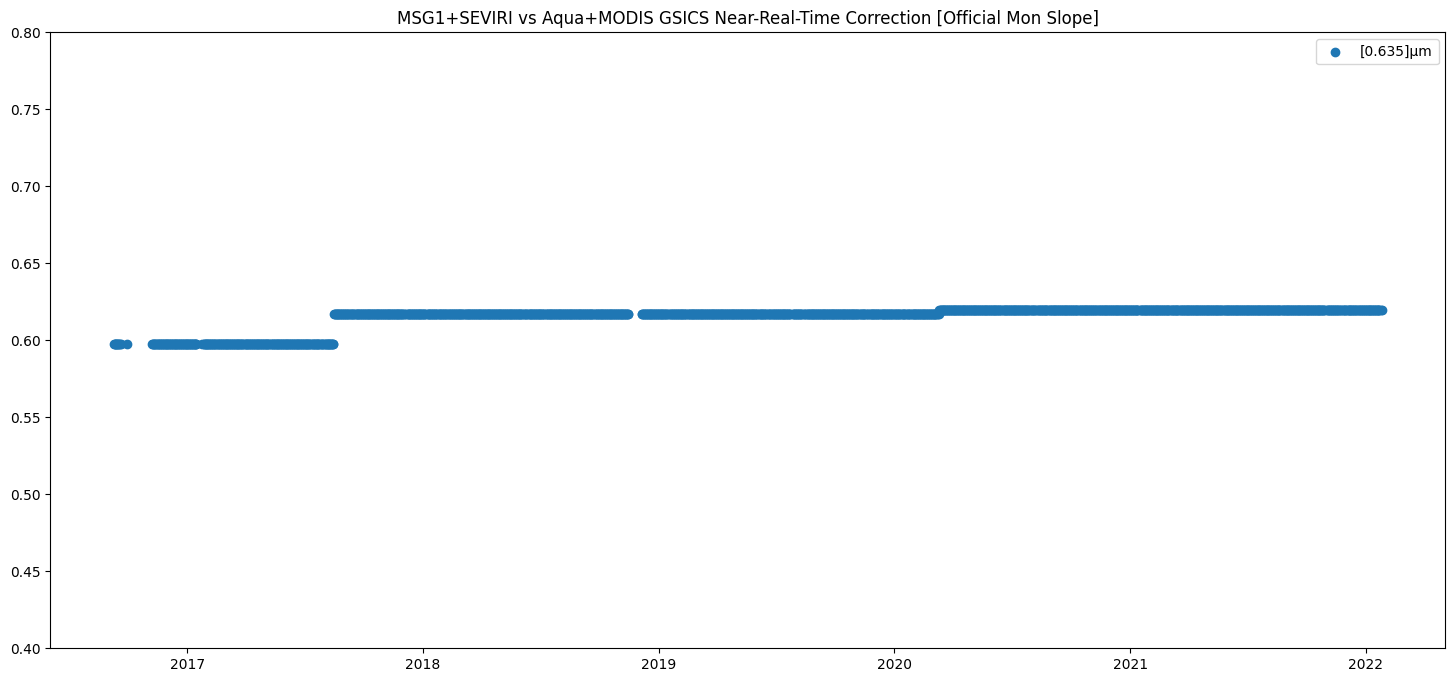

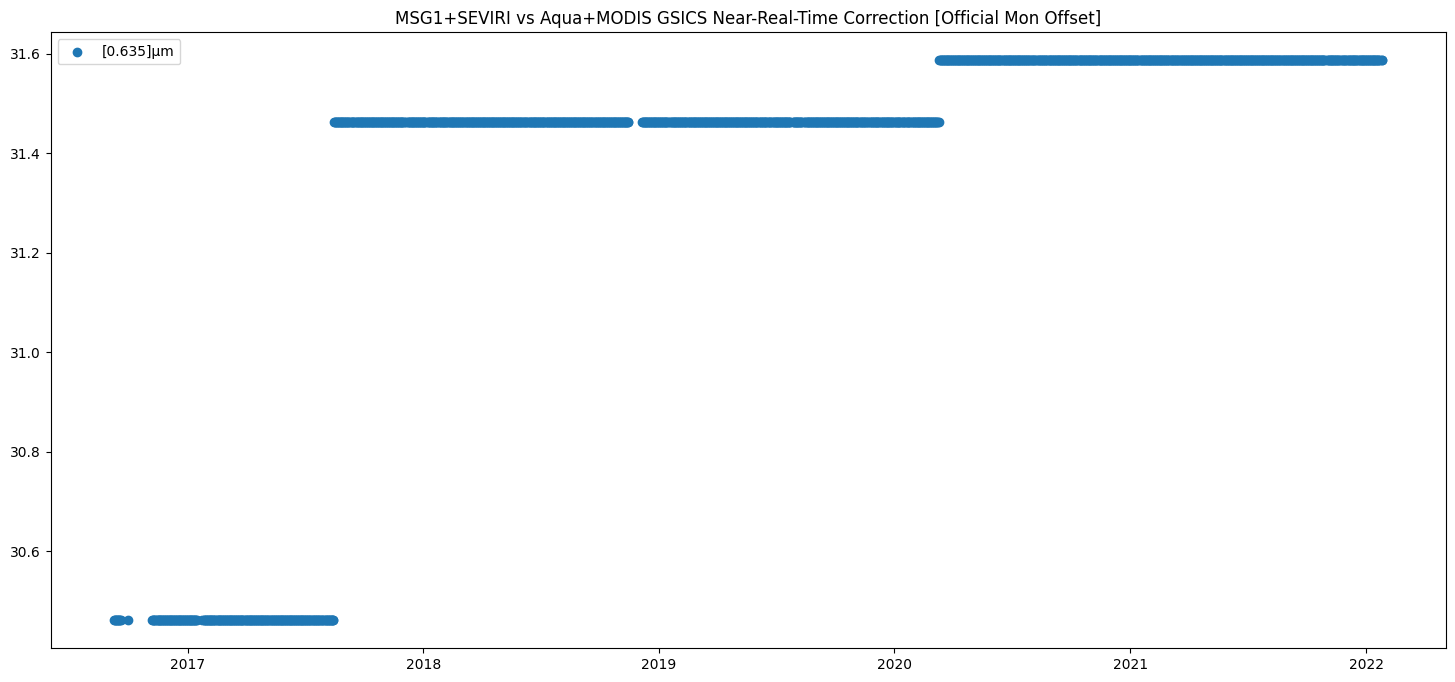

In [ ]:
plt.figure(figsize=(18,8))
plt.ylim(0.4, 0.8)
time_array    = ncid.variables['date'][:] #time
#plt.figure(figsize=(18,8))
#plt.ylim(-0.5, 0.5)
mon_inst   = ncid.monitored_instrument
#plt.plot(time_array,mon_slope)

plt.scatter(time_array,mon_official_slope)
plt.title(str(ncid.title)+" [Official Mon Slope]")
plt.legend([str(cfreq[0][0])+cfreq[0][1]])
#plt.plot(time_array,mon_slope)
plt.figure(figsize=(18,8))

plt.scatter(time_array,mon_official_offset)
plt.title(str(ncid.title)+" [Official Mon Offset]")
len(cfreq)
plt.legend( [str(cfreq[0][0])+cfreq[0][1]])